In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re

BUS_PATH = "../Singapore_bus"
dirs = os.listdir(BUS_PATH)
Bus_FileName_DirList = dirs
Bus_FileName_DirList
Bus_FileName_DirList = sorted(Bus_FileName_DirList)

In [18]:
weekday = [15, 16, 17, 18, 19, 20, 21]

In [19]:
# 删除小于0的值且将时间转为min
def del_less_zero(data):
    my_list = [x for x in data if (x >= 0)]
    # my_list = [x for x in data_1 if (x <= 200)]
    result_list = []
    for x in my_list:
        result_list.append(x / 60)
    re_data = [x for x in result_list if (x <= 1000)]
    return re_data

In [20]:
# 计算平均值,中位数,标准差,最小值,最大值,第一四分位数,第二四分位数,第三四分位数
import numpy as np
from scipy import stats


def calculate(data):
    # 平均值
    mean_value = np.mean(data)

    # 中位数
    median_value = np.median(data)

    # 标准差
    std_deviation = np.std(data)

    # 最小值和最大值
    min_value = np.min(data)
    max_value = np.max(data)

    # 四分位数
    q1, q2, q3 = np.percentile(data, [25, 50, 75])

    # 众数
    mode_value = stats.mode(data).mode[0]

    return [mean_value, median_value, std_deviation, min_value, max_value, q1, q2, q3, mode_value]

In [21]:

statistic_list = []
statistic_data = []
for day in weekday:
    data_day = pd.read_csv(os.path.join(BUS_PATH, Bus_FileName_DirList[day]))
    data = data_day.loc[:, ['Bus_Service_Number', 'Boarding_stop_stn',
                            'Ride_start_date', 'Ride_start_time', 'Ride_end_date', 'Ride_end_time']]

    data = data[(data.Ride_start_date >= "05:30:00") &
                (data.Ride_start_time < "23:45:00")]
    data['a'] = ' '
    data.Ride_start_time = pd.to_datetime(
        data.Ride_start_date+data.a+data.Ride_start_time)
    data.Ride_end_time = pd.to_datetime(
        data.Ride_end_date+data.a+data.Ride_end_time)

    data_temp = data.copy()

    data_diff = data_temp['Ride_end_time'] - data_temp['Ride_start_time']
    y_data = data_diff.dt.total_seconds()
    y_list = y_data.to_list()
    # statistic_list.append(del_less_zero(y_list))
    statistic_list.append(y_list)
    # statistic_data.append(calculate(result_list))
    print(day)

15
16
17
18
19


/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_46974/1411069273.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_day = pd.read_csv(os.path.join(BUS_PATH, Bus_FileName_DirList[day]))


20
21


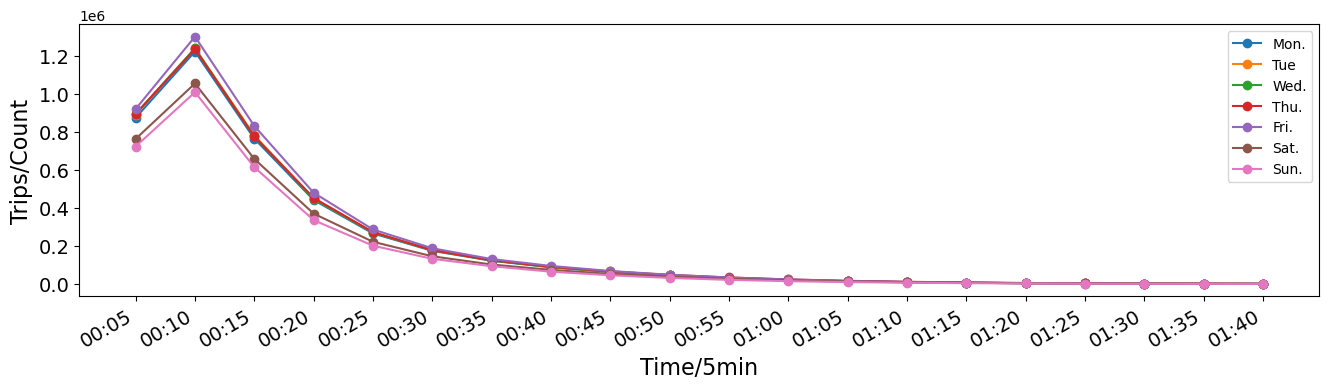

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

fig = plt.figure(figsize=(16, 4))
weekday_name = ['Mon.', 'Tue', 'Wed.', 'Thu.', 'Fri.', 'Sat.', 'Sun.']
# 原始数据
my_list_0 = del_less_zero(statistic_list[0])
my_list_1 = del_less_zero(statistic_list[1])
my_list_2 = del_less_zero(statistic_list[2])
my_list_3 = del_less_zero(statistic_list[3])
my_list_4 = del_less_zero(statistic_list[4])

my_list_5 = del_less_zero(statistic_list[5])
my_list_6 = del_less_zero(statistic_list[6])

# 生成时间数据，假设起始时间为当前时间
start_time = datetime.strptime("00:05", "%H:%M")
time_values = [start_time + timedelta(minutes=i*5) for i in range(20)]

# 设置划分区间的范围和间隔
bin_range = (0, 100)
bin_interval = 5

# 生成划分区间
bins = np.arange(bin_range[0], bin_range[1] + bin_interval, bin_interval)

# 统计每个区间的数量
hist_values_0, bin_edges = np.histogram(my_list_0, bins=bins)
hist_values_1, bin_edges = np.histogram(my_list_1, bins=bins)
hist_values_2, bin_edges = np.histogram(my_list_2, bins=bins)
hist_values_3, bin_edges = np.histogram(my_list_3, bins=bins)
hist_values_4, bin_edges = np.histogram(my_list_4, bins=bins)
hist_values_5, bin_edges = np.histogram(my_list_5, bins=bins)
hist_values_6, bin_edges = np.histogram(my_list_6, bins=bins)


# x_values = np.arange(len(hist_values))

# 画直方图
# plt.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), edgecolor='black')
plt.plot(time_values, hist_values_0, marker='o',
         linestyle='-',  label=weekday_name[0])
plt.plot(time_values, hist_values_1, marker='o',
         linestyle='-',  label=weekday_name[1])

plt.plot(time_values, hist_values_2, marker='o',
         linestyle='-',  label=weekday_name[2])
plt.plot(time_values, hist_values_3, marker='o',
         linestyle='-',  label=weekday_name[3])
plt.plot(time_values, hist_values_4, marker='o',
         linestyle='-',  label=weekday_name[4])
plt.plot(time_values, hist_values_5, marker='o',
         linestyle='-',  label=weekday_name[5])
plt.plot(time_values, hist_values_6, marker='o',
         linestyle='-',  label=weekday_name[6])

# 设置横轴刻度格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# 设置横轴刻度为五分钟间隔
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=5))

# 添加标签和标题

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time/5min', fontsize=16)
plt.ylabel('Trips/Count', fontsize=16)

# 显示图例
plt.legend()

# 自动调整横轴刻度
plt.gcf().autofmt_xdate()

# 显示图形
plt.show()
fig.savefig('./一周行程时间统计图.svg')

In [23]:
statistic_list[0]

[2420.0,
 1021.0,
 1764.0,
 231.0,
 1516.0,
 377.0,
 533.0,
 647.0,
 777.0,
 464.0,
 138.0,
 1119.0,
 420.0,
 2878.0,
 891.0,
 548.0,
 1295.0,
 1245.0,
 117.0,
 1406.0,
 372.0,
 228.0,
 1262.0,
 1287.0,
 487.0,
 345.0,
 1145.0,
 1489.0,
 729.0,
 509.0,
 730.0,
 818.0,
 574.0,
 1271.0,
 1250.0,
 380.0,
 861.0,
 1600.0,
 221.0,
 3099.0,
 158.0,
 1315.0,
 846.0,
 519.0,
 1978.0,
 327.0,
 1135.0,
 2785.0,
 1494.0,
 443.0,
 852.0,
 374.0,
 2067.0,
 507.0,
 1796.0,
 213.0,
 190.0,
 489.0,
 181.0,
 1014.0,
 297.0,
 245.0,
 1127.0,
 1371.0,
 1083.0,
 533.0,
 1442.0,
 1673.0,
 339.0,
 83.0,
 165.0,
 345.0,
 1224.0,
 450.0,
 457.0,
 1180.0,
 1276.0,
 465.0,
 310.0,
 1775.0,
 1173.0,
 161.0,
 483.0,
 1230.0,
 1788.0,
 1513.0,
 482.0,
 1151.0,
 1392.0,
 742.0,
 274.0,
 1409.0,
 139.0,
 1103.0,
 204.0,
 1524.0,
 131.0,
 1354.0,
 314.0,
 1069.0,
 350.0,
 767.0,
 98.0,
 1495.0,
 738.0,
 1156.0,
 658.0,
 294.0,
 371.0,
 65.0,
 150.0,
 910.0,
 293.0,
 1552.0,
 427.0,
 136.0,
 1582.0,
 471.0,
 1188.0,
 